<a href="https://colab.research.google.com/github/caspervanengelenburg/interactive_architecture_Q3_CV2/blob/main/interactive_architecture_Q3_CV2_guide.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Computer vision session 2 - *detection*, *size estimation*, and *localization* of design elements

1:1 Interactive Architecture Prototypes (ARO122, Delft University of Technology, faculty of Architecture and the Built-Environment)

[Link github repository CV sessions](https://github.com/caspervanengelenburg/interactive_architecture_Q3_CV2)


## Set-up 

The organization of the assignment is as follows:

- [pre-requisites and instructions](#pre)
- [bigger picture and output](#bigger-picture)
- [recap of previous assignment](#recap)
- [introduction to python course library](#library)
- [image processing and binary operations](#imgprocessing)
- [advanced classical computer vision: contour finding and warping](#advanced)
- [the link to detection, size estimation, and localization](#link)
- [your own pipeline](#assignment)

<a name="pre"></a>
## Pre-requisites
- completion of first Computer vision (CV) assignment: "Computer vision 1 - Interactive Architecture Prototypes"
- basic understanding of work-around in _Python_
- basic understanding of work-around in _Google Colaboratory_
- basic understanding of _OpenCV_ library and how to import, load, and plot images

## Instructions

To start working on the assignment in Colab, first **open in Colab** (`open in Colab` on the top of the file) and afterwards **save a copy on your Google Drive** (`File` $→$ `Save a copy in Drive`). 

If you have a saved copy, you are ready to start working on the assignment. Please go through the assignment in chronological order. 

<a name="bigger-picture"></a>
## The bigger picture and output

In the assignment, you will learn to create a hand-made pipeline that can detect, estimate, and localize the design elements at the 'pick' location. This is necessary information to inform the robotic arm where it should go to in the next iteration. With only the use of real-time camera's (no markers, no other sensors), advanced computer vision methods have proven to be able to do these type of tasks in arguably complex and difficult-to-understand environments. In this assignment, you will focus on relatively simple (classical) computer vision approaches and constrain the problem to be something that is doable in the limited amount of time you have. Besides, we think there is an educational benefit as well: you will understand, at the fundamental level, the methods we will discuss. Let's start! 

A sketch of the physical domain can be found below.

To make the task relatively easy, the following is required:

- camera position: top view makes sure the 'pick' domain can be effectively represented in 2D
- rectangular frame around the 'pick' domain. The robot knows the exact dimensions and coordinates of the rectangular frame.

<a name="recap"></a>
## Recap

- Mount drive
- Reading an image
- Image as a 3D array representing the 2D spatially arranged pixels (having 3 channels - RGB - all).
- Image cropping (manipulating the domain of the image)
- Difference and switching between RGB and Gray-scale

In [1]:
#You need to give access to your google drive to mount the virtual drive here
import os
from google.colab import drive
drive.mount('/content/gdrive')

#read image using cv2.imread (note: these might differ from your folder structure and filename)
img =  cv2.imread(r"/content/gdrive/My Drive/PhD/Interactive architecture/coins-boundingbox.png")

#shows the image
imshow(img)

Mounted at /content/gdrive


In [4]:
#read image using cv2.imread (note: these might differ from your folder structure and filename)
img =  cv2.imread(r"/content/gdrive/My Drive/PhD/Interactive architecture/coins-boundingbox.png")

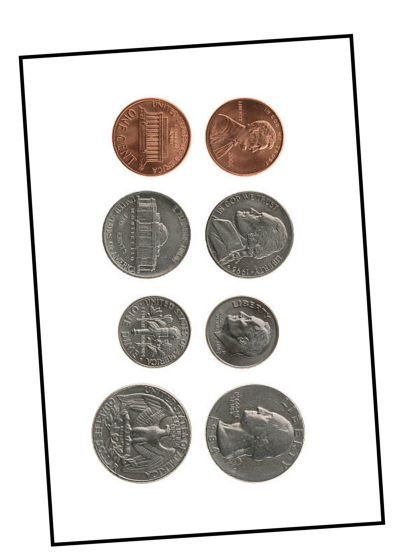

In [5]:
#shows the image
imshow(img)

<a name="library"></a>
## Image manipulation library

- mention the self-made library
- where it can be found
- split 
  - image pre-processing 
  - image filtering for blurring and binary operations
  - advanced methods: contour finding and warping
- download library

links: [course library documentation](https://github.com/caspervanengelenburg/interactive_architecture_Q3_CV2/blob/main/ia-cv-library.md), [course library python](https://github.com/caspervanengelenburg/interactive_architecture_Q3_CV2/blob/main/ia-cv-library.py)

To be added to functions:
- [ ] read image function
- [ ] create function: from url to import 
- [ ] create function: from drive to image

In [2]:
!pip install requests
import requests
import cv2

def url2libary(url):
    
    #get url
    r = requests.get(url)

    # make sure your filename is the same as how you want to import 
    with open('iacvlibrary.py', 'w') as f:
        f.write(r.text)

In [3]:
# If you are using GitHub, make sure you get the "Raw" version of the code
url = 'https://raw.githubusercontent.com/caspervanengelenburg/interactive_architecture_Q3_CV2/main/iacvlibrary.py?token=GHSAT0AAAAAABRM23EN7ZZEITXDHZBVJW5GYQ7PZSA'

# use url2libary to import the library
url2libary(url)

# now we can import (* import all!)
from iacvlibrary import *

<a name="imgprocessing"></a>
## Image processing and binary operations

In [6]:
#shape of the image
getshape(img)

Shape of the image is 2589 x 1811 x 3 (height x width x dimension)


Shape of the image is 714 x 500 x 3 (height x width x dimension)


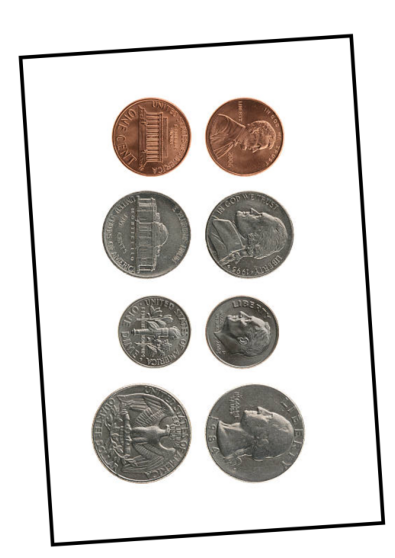

In [32]:
#reshape the image
img = imresize(img, w_resize=500)
getshape(img)

imshow(img)

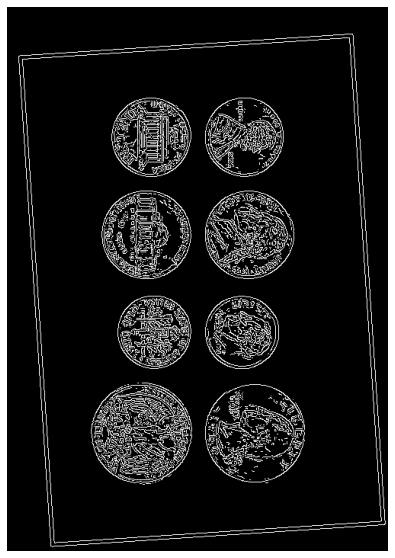

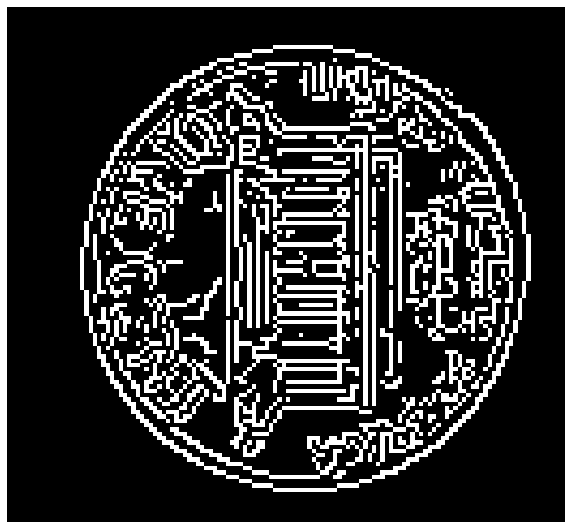

In [62]:
edged = edge(img)

imshow(edged)

#zoom
edged_zoom = edged[110:230, 120:250]
imshow(edged_zoom)

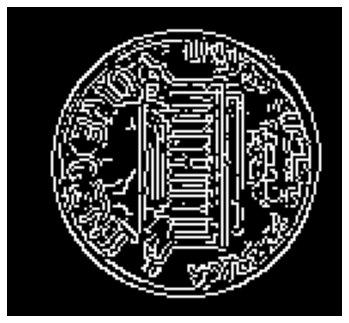

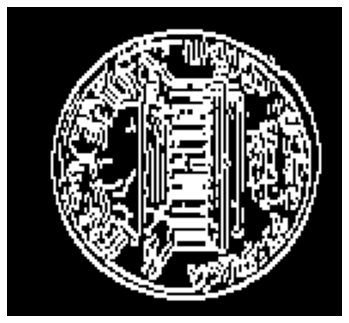

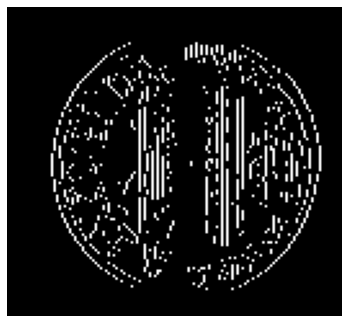

In [61]:
#dilation and erosion
dilate_zoom = dilate(edged_zoom)
erode_zoom = erode(edged_zoom)

#show
imshow(edged_zoom, figsize=[6,6])
imshow(dilate_zoom, figsize=[6,6])
imshow(erode_zoom, figsize=[6,6])

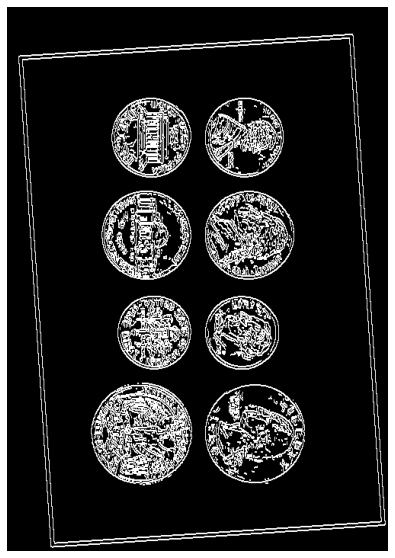

In [63]:
edged = dilate(edged)
imshow(edged)

<a name="advanced"></a>
## Advanced classical computer vision methods: *contour finding and warping*

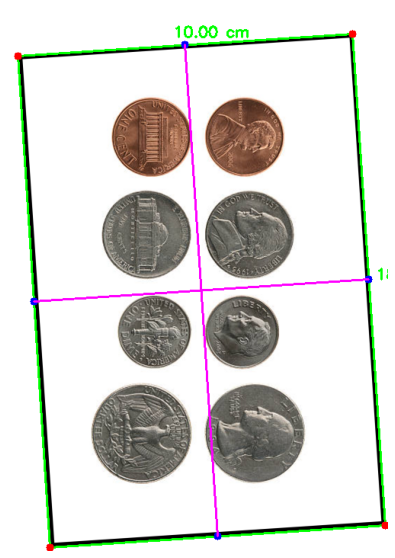

In [19]:
frame = [10, 18]

cnt  = findcnts(edged)
bbox = getbbox(cnts)
drawbbox(img, bbox, dimbbox=frame)

Shape of the image is 373 x 612 x 3 (height x width x dimension)


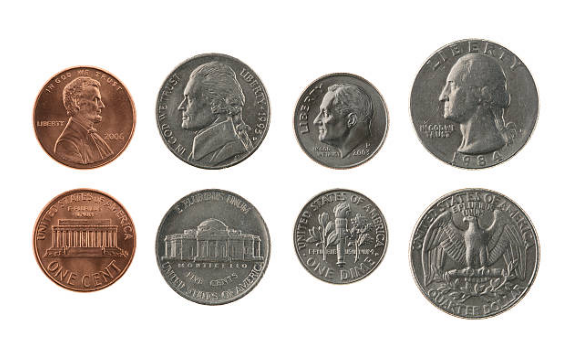

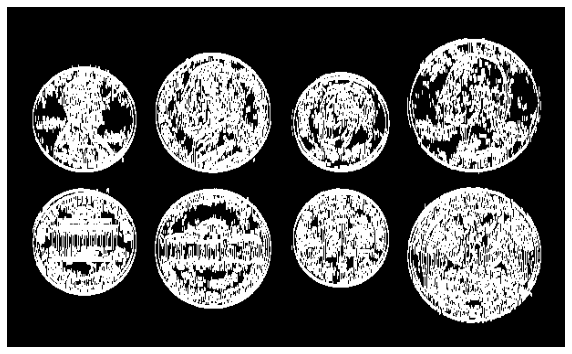

In [16]:
#read image using cv2.imread (note: these might differ from your folder structure and filename)
img2 =  cv2.imread(r"/content/gdrive/My Drive/PhD/Interactive architecture/coins.jpg")

#shows the image
imshow(img2)

#get shape
getshape(img2)

#edge, erode, dilate
edged2 = edge(img2)
edged2 = dilate(edged2, iterations=3)

#show
imshow(edged2)

Pixels per cm in X and Y = 34.00


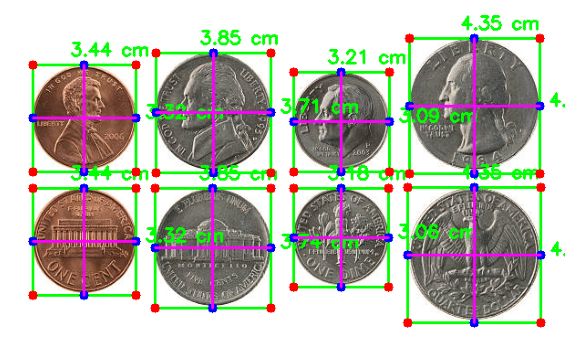

In [17]:
pixpm = pixpermetric(img2, frame[1], show=True)

cnts  = findcnts(edged2)
bboxs = getbbox(cnts)
drawbbox(img2, bboxs, pixpm=pixpm)

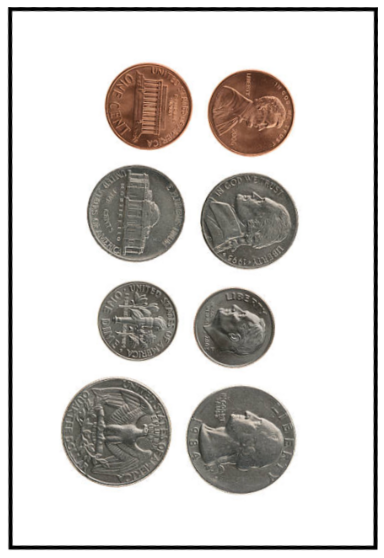

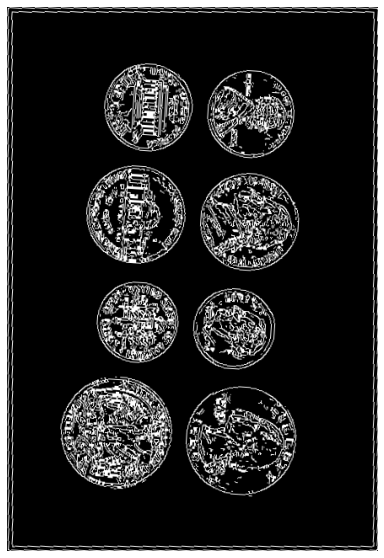

In [25]:
#warp image
img_w = warp(img, cnt[0])
edged_w = warp(edged, cnt[0])

#show
imshow(img_w)
imshow(edged_w)

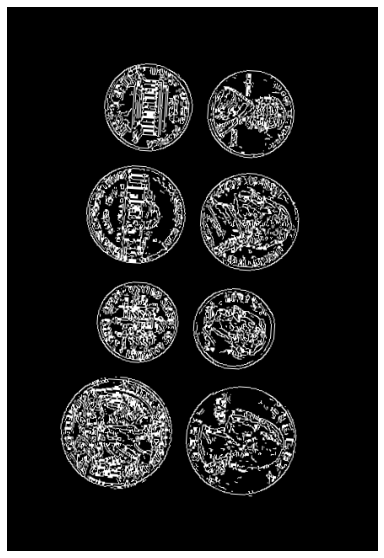

In [27]:
#black borders
edged_w = border2black(edged_w, off=30)

#show
imshow(edged_w)

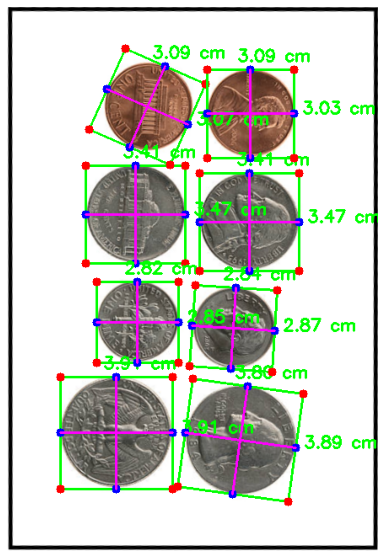

In [28]:
cnts  = findcnts(edged_w)
bboxs = getbbox(cnts)
drawbbox(img_w, bboxs, pixpm=pixpm)

<a name="link"></a>
## Linking the 'functions' to the task: detection, estimation, and localization of the design elements.

<a name="assignment"></a>
## Create your own script!